<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Root-Finding">Root Finding</a></li>
<ol><li><a class="" href="#Graphical-Method">Graphical Method</a></li>
<li><a class="" href="#Bisection-Method">Bisection Method</a></li>
<ol><li><a class="" href="#Implementation">Implementation</a></li>
</ol><li><a class="" href="#Newton's-Method">Newton's Method</a></li>
<li><a class="" href="#Secant-Method">Secant Method</a></li>
<li><a class="" href="#Comparing-These-Methods">Comparing These Methods</a></li>
<ol><li><a class="" href="#Convergence">Convergence</a></li>
<ol><li><a class="" href="#For-f(x)">For f(x)</a></li>
<li><a class="" href="#For-g(x)">For g(x)</a></li>
</ol><li><a class="" href="#Time">Time</a></li>
</ol>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Root Finding

## Graphical Method

## Bisection Method

* A successive approximation method that narrows down an interval that
contains a root of the function f(x).
* Cuts the interval into 2 halves and check which half interval contains a root of
the function.

### Implementation

In [2]:
def bisection(f, a, b, tol=1e-6, maxiter=100, verbose=True):
    for _ in range(maxiter):
        root = (a+b)/2
        multiple = f(a)*f(root)
        if np.abs(multiple) < tol:
            return root
        if multiple > 0:
            a = root
        elif multiple < 0:
            b = root
    if verbose:
        print("Max iterations reached")
    return root
            

In [13]:
def f(x):
    return (np.sin(x)-x)/np.sin(x) - 0.01

In [6]:
# f = lambda x: x**2-5
a = 25
b = 0
root = bisection(f, a, b)
print(root)

Max iterations reached
3.141592653589793


## Newton's Method

Let the initial guess be x0. The $n^{th}$ guess is:
$$
x_{n+1} = x_n -  \frac{f(x_n)}{f'(x_n)}
$$

In [7]:
def derivative(f, x, h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [8]:
def newton(f, x0, tol=1e-6, maxiter=100, verbose=True):
    for _ in range(maxiter):
        x = x0 - f(x0)/derivative(f, x0)
        if np.abs(x-x0) < tol:
            return x
        x0 = x
    if verbose:
        print("Max iterations reached")
    return x

In [14]:
newton(f, 5, verbose=True)

Max iterations reached


-513.6874073129995

## Secant Method

This method does not require to calculate the derivative of the function. We begin with two guesses. The ${i+1}^{th}$ guess in terms of previous two guesses  $x_{n}$ and $x_{n-1}$ is given by:
$$
x_{i+1} = x_{i} - \frac{f(x_{i})(x_{i-1}-x_i)}{f(x_{i-1}) - f(x_{i})}
$$

In [15]:
def secant(f, x_present, x_previous, tol=1e-6, maxiter=100, verbose=True):
    for _ in range(maxiter):
        x_next = x_present - (f(x_present)*(x_previous-x_present))/(f(x_previous)-f(x_present))
        if np.abs(x_next-x_present) < tol:
            return x_next
        x_previous = x_present
        x_present = x_next
    if verbose:
        print("Max iterations reached")
    return x_next

In [19]:
secant(f, 5, 4, maxiter=10000000)

0.4305366052199741

In [24]:
def f(x):
    return -(np.sin(x)-x)/np.sin(x) + 0.01

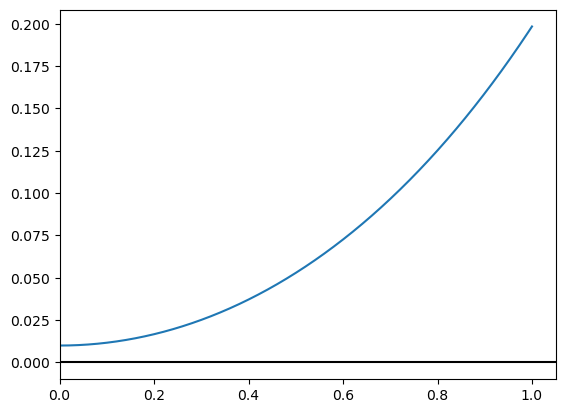

In [25]:
Xs = np.linspace(1e-6, 1, 1000)

plt.plot(Xs, f(Xs))
plt.xlim(0,)
plt.axhline(0, color='k')

## Comparing These Methods

We'll be using the following functions:
$$
f(x) = \sin(x)\\
g(x)= x^2 - 2\\
$$
The real roots of these functions are: $0, \pm \sqrt2 $

### Convergence

In [78]:
from decimal import Decimal

In [117]:
f = lambda x: np.sin(x)
g = lambda x: x**2-2
h = lambda x: x**3-3*x**2+2

def error(func, x):
    if func == f:
        return np.abs(x)
    if func == g:
        er1 = np.abs(x-(np.sqrt(2)))
        er2 = np.abs(x+np.sqrt(2))
        return np.min([er1, er2]/np.sqrt(2))

def error_with_iter(f, iter = 10):
    bisection_errors = []
    newton_errors = []
    secant_errors = []
    for i in range(1, iter):
        root_b = bisection(f, -1.5, 1, maxiter=i, verbose=False)
        root_n = newton(f, 1, maxiter=i, verbose=False)
        root_s = secant(f, -1.5, 1, maxiter=i, verbose=False)
        bisection_errors.append(np.abs(error(f, root_b)))
        newton_errors.append(np.abs(error(f, root_n)))
        secant_errors.append(np.abs(error(f, root_s)))
    return bisection_errors, newton_errors, secant_errors


In [86]:
plt.rcdefaults()

#### For f(x)

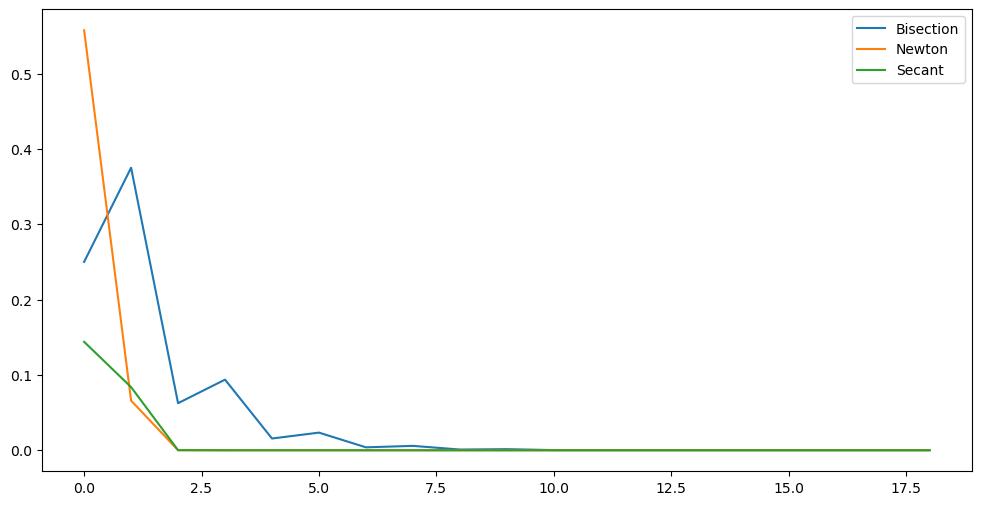

In [87]:
bisection_errors, newton_errors, secant_errors = error_with_iter(f, iter=20)
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.legend()
plt.show()

It looks like all three are performing pretty good at higher iterations. But this is not true!

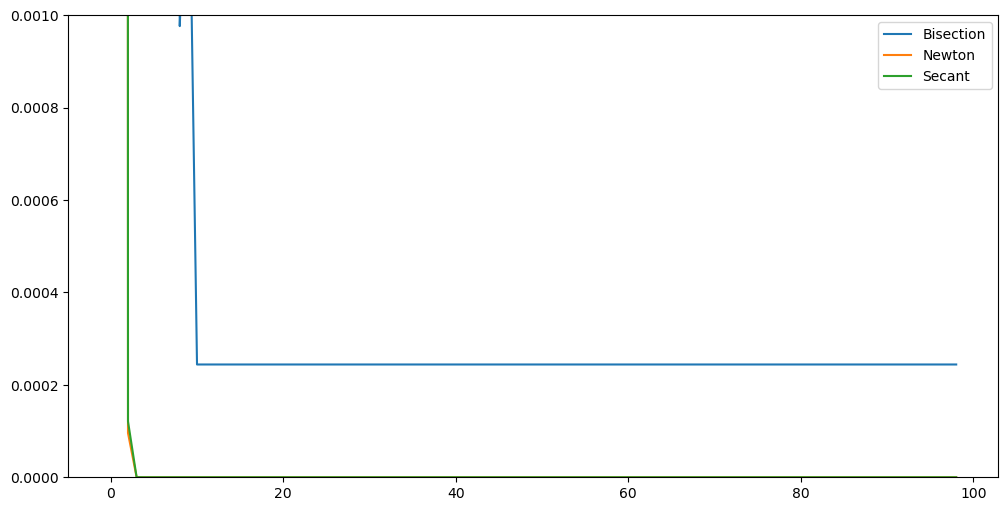

In [96]:
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.ylim([0, 0.001])
plt.legend()
plt.show()

The Bisection method has stopped converging at about 0.0002 relative error. While both the Secant and Newton methods are converging to much lower error.

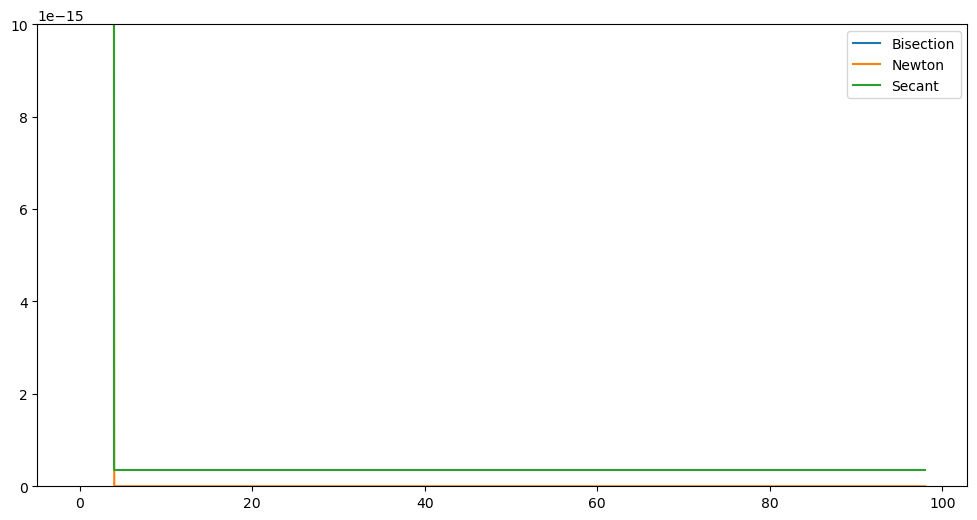

In [98]:
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.ylim([0, 1e-14])
plt.legend()
plt.show()

Secant method is converging to a lower error than the Bisection method. However, the Newton method is converging to a lower error than the Secant method.

#### For g(x)

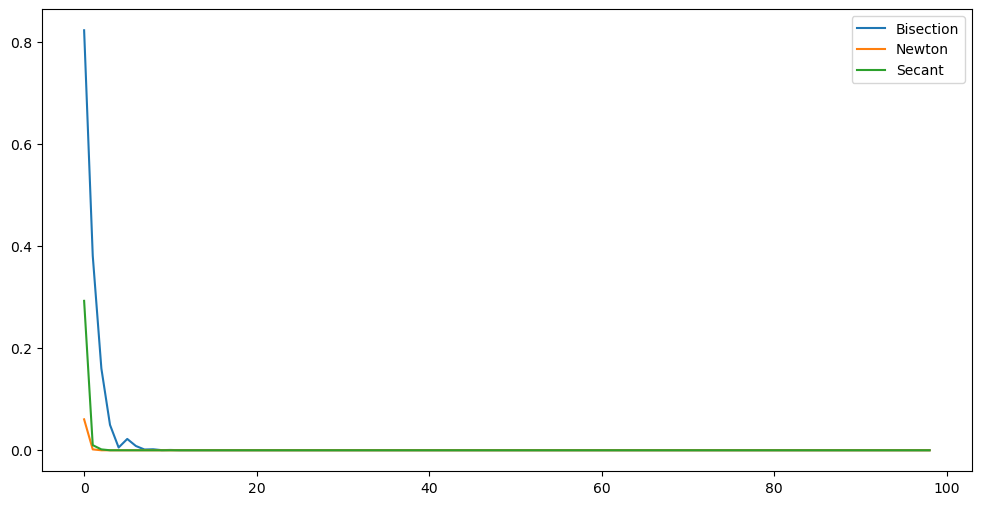

In [101]:
bisection_errors, newton_errors, secant_errors = error_with_iter(g, iter=100)
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.legend()
plt.show()

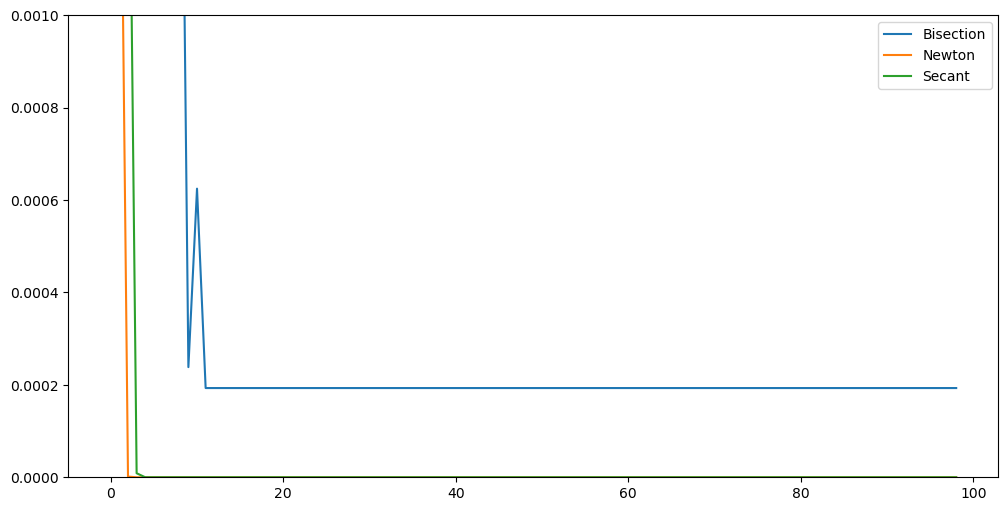

In [102]:
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.ylim([0, 0.001])
plt.legend()
plt.show()

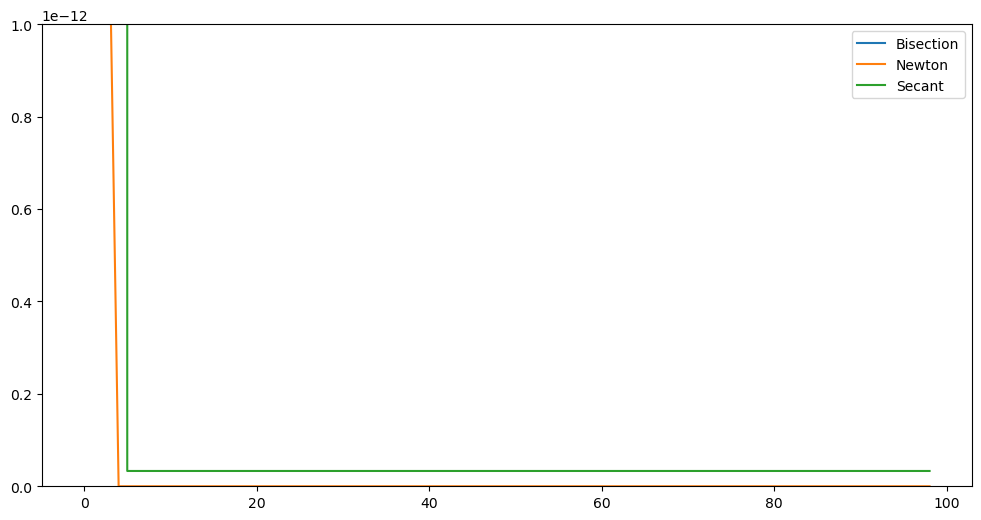

In [103]:
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.ylim([0, 1e-12])
plt.legend()
plt.show()

The same thing happens for g(x).

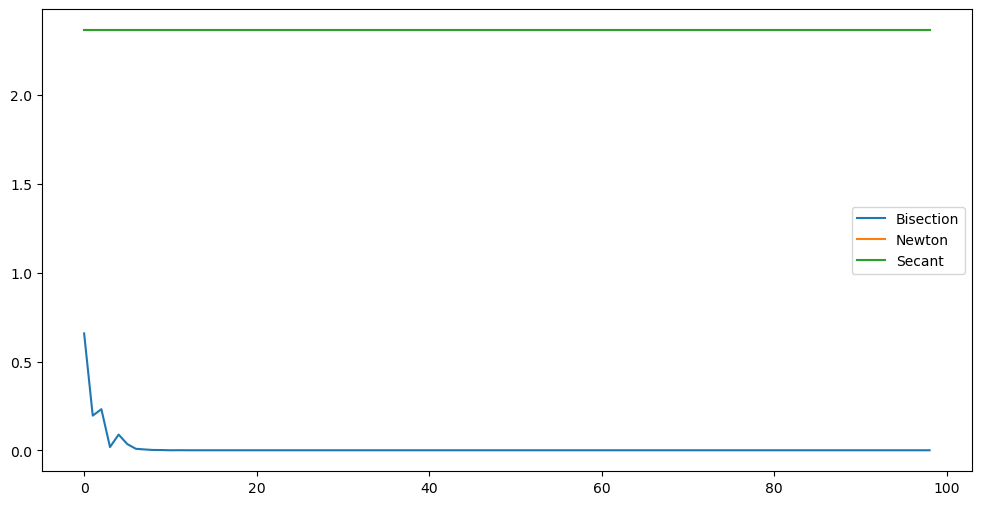

In [107]:
bisection_errors, newton_errors, secant_errors = error_with_iter(h, iter=100)
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
plt.legend()
plt.show()

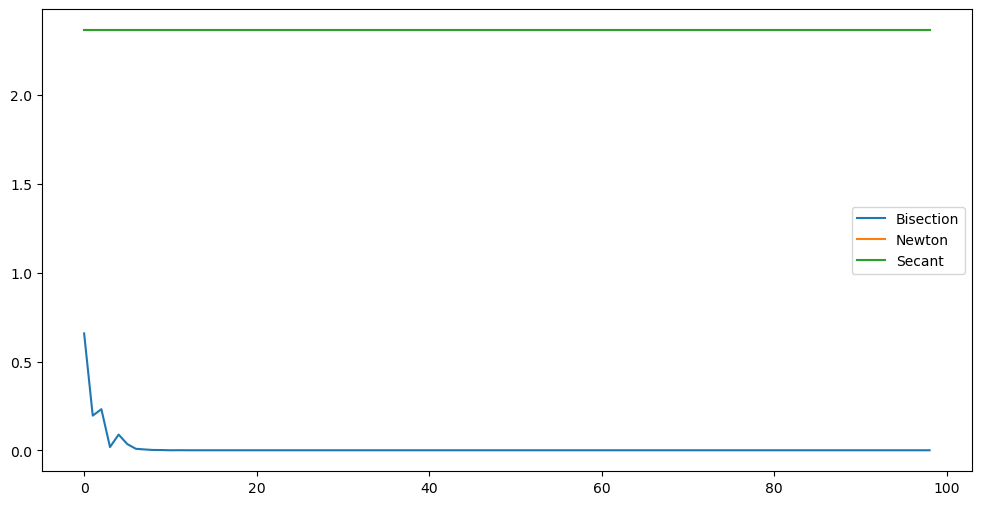

In [116]:
plt.figure(figsize=(12,6))
plt.plot(bisection_errors, label="Bisection")
plt.plot(newton_errors, label="Newton")
plt.plot(secant_errors, label="Secant")
# plt.ylim([0, 1e-3])
plt.legend()
plt.show()

### Time

In [111]:
time_bisection = timeit.timeit(stmt="bisection(f, -1.5, 1, maxiter=100, verbose=False)",
                                setup="from __main__ import bisection, f",
                                number=1000)
time_newton = timeit.timeit(stmt="newton(f, 1, maxiter=100, verbose=False)",
                            setup="from __main__ import newton, f, derivative",
                            number=1000)
time_secant = timeit.timeit(stmt="secant(f, -1.5, 1, maxiter=100, verbose=False)",
                            setup="from __main__ import secant, f",
                            number=1000)

time_bisection, time_newton, time_secant

(0.2370058999995308, 0.13008859999990818, 0.11589320000075531)

Secant method is performing the best followed by the Newton method (Newton method is slower because it has to calculate the derivative of the function too).